## DAB303 Marketing Analytics_Individual Project
### Name: Brian Christian
### Student_Id: 0773969

### Topic: BMW used car pricing prediction

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing data
data=pd.read_csv("BMW used car pricing prediction.csv")

In [4]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [7]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


### Cleaning the data

In [8]:
#Replacing null values(i.e '0') 
data["tax"]=data["tax"].replace(0,np.nan)
data["engineSize"]=data["engineSize"].replace(0,np.nan)

In [9]:
data.isna().sum()
data.dropna( inplace = True)

In [10]:
#Drop all the duplicate values and cleaning the data
data.duplicated().sum()
data.drop_duplicates(inplace=True)


In [11]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10302.00000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000
mean,2017.10134,22973.357698,25107.062318,135.916812,53.569084,2.195098
std,2.37259,11461.907345,25025.831074,57.589904,16.048268,0.533098
min,1996.00000,1200.000000,1.000000,20.000000,5.500000,0.600000
25%,2016.00000,14999.000000,5500.000000,145.000000,44.800000,2.000000
50%,2017.00000,20750.000000,17598.000000,145.000000,52.300000,2.000000
75%,2019.00000,27990.000000,37521.750000,145.000000,61.400000,2.000000
max,2020.00000,123456.000000,214000.000000,580.000000,470.800000,6.600000


### Data Visualization

In [12]:
data.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.624533,-0.781890,-0.008705,-0.071222,-0.046142
price,0.624533,1.000000,-0.604921,0.234313,-0.327140,0.462230
mileage,-0.781890,-0.604921,1.000000,-0.133887,0.156089,0.016724
tax,-0.008705,0.234313,-0.133887,1.000000,-0.393863,0.406275
mpg,-0.071222,-0.327140,0.156089,-0.393863,1.000000,-0.380073
engineSize,-0.046142,0.462230,0.016724,0.406275,-0.380073,1.000000


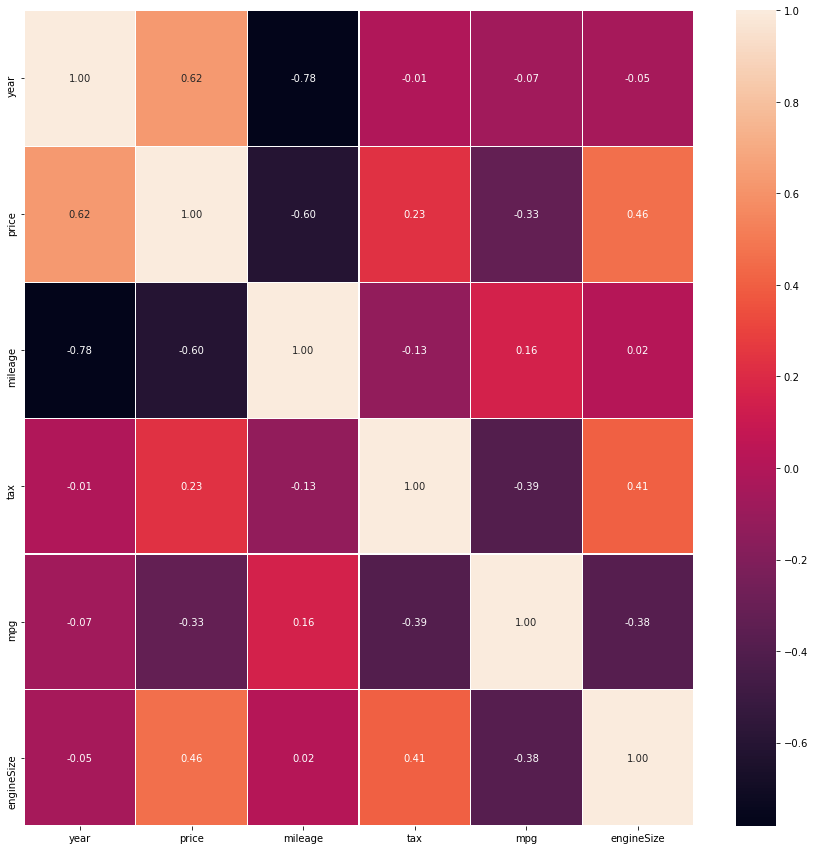

In [13]:
heat_map= plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=0.2, fmt= '.2f')
plt.show() 

#### The heat-map gives insight about correlation between different variables.

<AxesSubplot:xlabel='mileage', ylabel='price'>

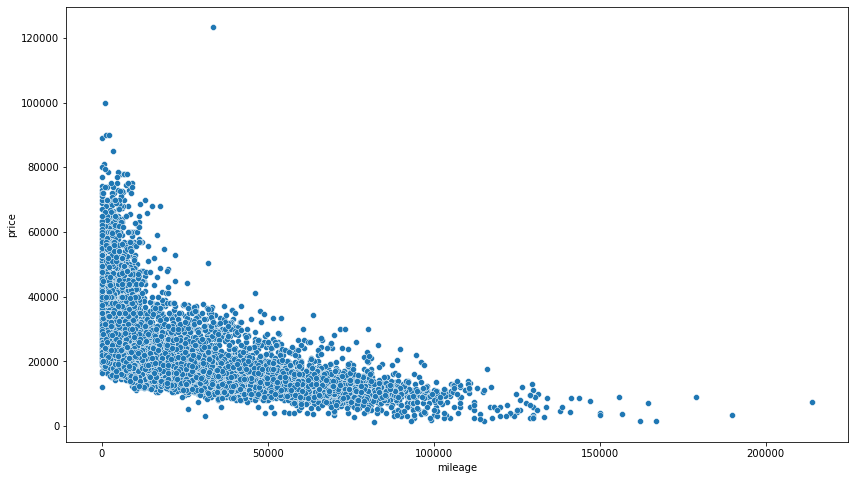

In [19]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=data['mileage'], y=data['price'])

#### Above scatter plot shows that price of the car is dependent on mileage.

<AxesSubplot:xlabel='engineSize', ylabel='price'>

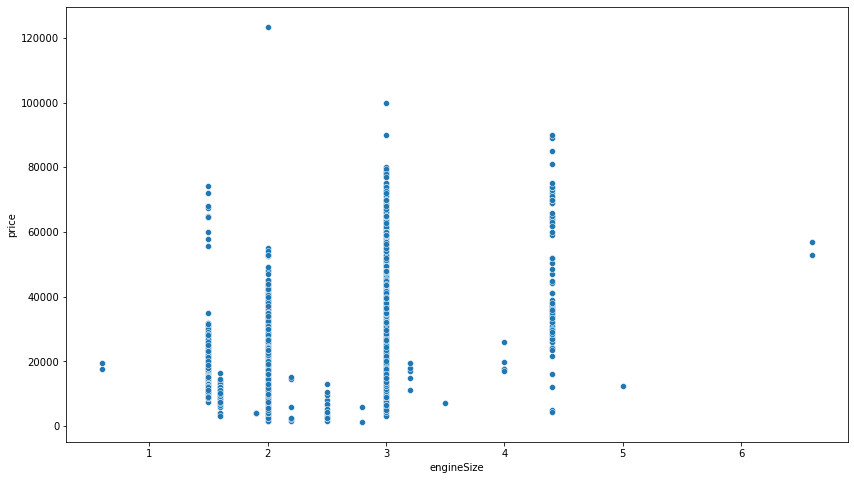

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=data['engineSize'], y=data['price'])

#### The above scatter plot displays that most of the engine size lies between 1 to 5 and so the price till 1,00,000. There are some outliers in it.

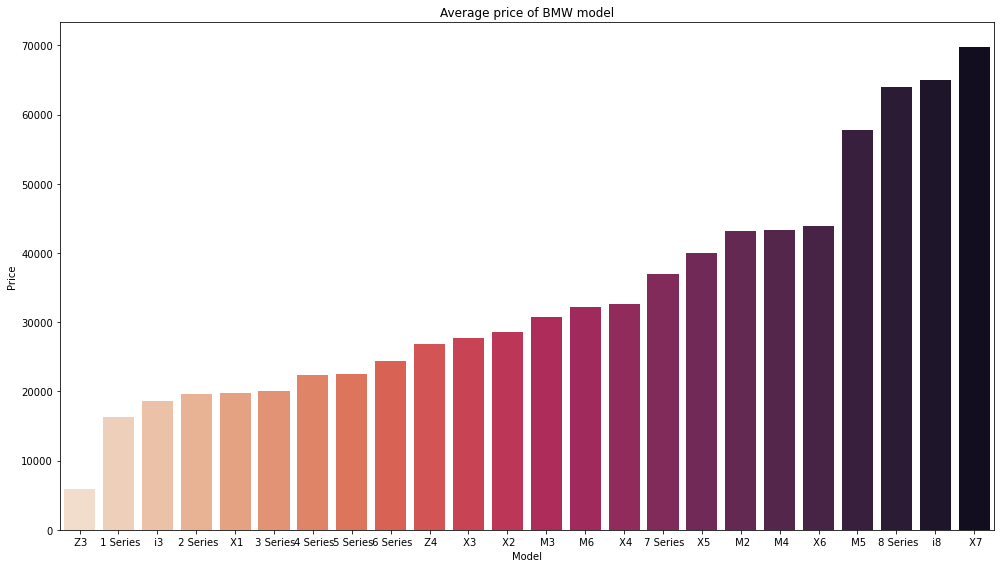

In [15]:
model_price = data.groupby('model')['price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Average price of BMW model")
pal = sns.color_palette("rocket_r", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pal)

plt.xlabel("Model")
plt.ylabel("Price")
plt.tight_layout()

#### The bar chart shows that X7 model is the costliest compared to other models whereas Z3 model's price is the least.

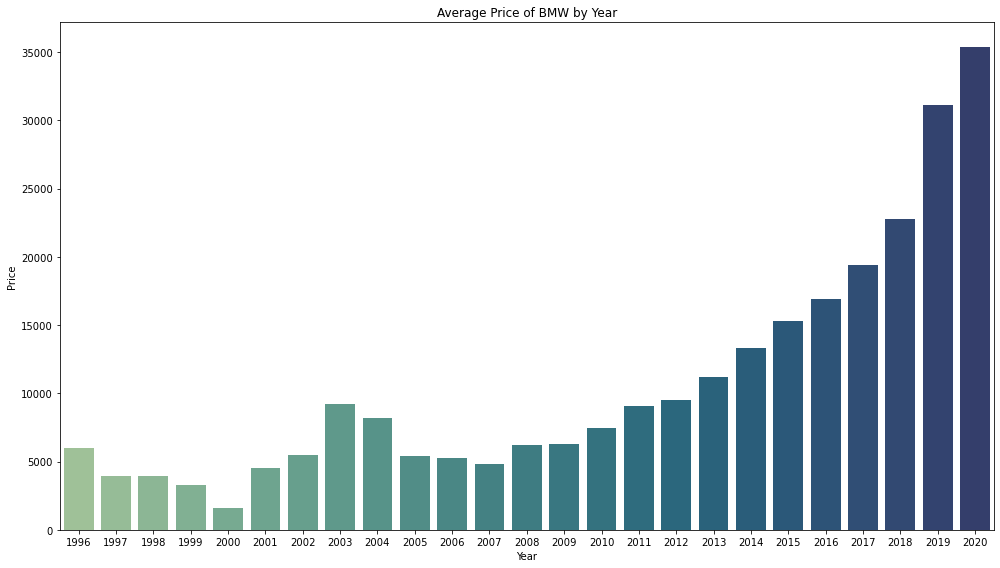

In [21]:
year_price = data.groupby('year')['price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Average Price of BMW by Year")
pal = sns.color_palette("crest", len(year_price))

sns.barplot(x=year_price.index, y=year_price.values, palette=pal)

plt.xlabel("Year")
plt.ylabel("Price")
plt.tight_layout()

#### The above bar graph gives an insight about the price change during years. As per the observation, in the year 2020 the prices are the maximum and in 2000 the price of the car is the lowest.

<AxesSubplot:ylabel='fuelType'>

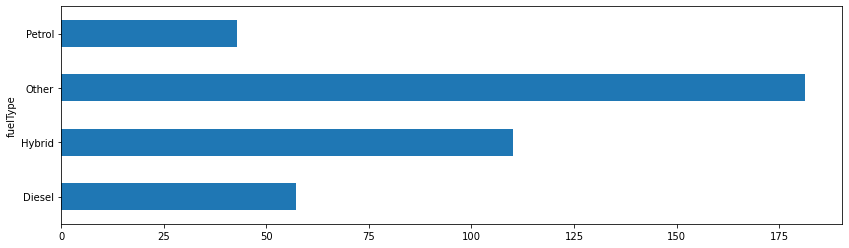

In [23]:
plt.figure(figsize=(14,4))
data.groupby('fuelType')['mpg'].mean().plot.barh()

#### The above bar chart gives idea about the fuel type and its count. There are more cars with other fueltype compared to petrol, diesel and hybrid. The least amount is of petrol cars.


### Standardize the data & Making a model

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


X = data.drop('price', axis=1)
X = pd.get_dummies(X)
y = data['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = data.drop(['price'], axis=1)
X['year'] = np.log(X['year'])
X['mileage'] = np.log(X['mileage'])
X = pd.get_dummies(X, drop_first=True)
y = data['price']
y = np.log1p(y)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE', mean_squared_error(y_true=y_test, y_pred=y_pred))
print('R2', r2_score(y_true=y_test, y_pred=y_pred))

MSE 0.02226934275821488
R2 0.8992270508225505


#### In modeling, I've used linear regression because there is some relation between the target variable (price) and other variable. So, linear regression can estimate the fit. 
#### As the calculated value give some insights that the MSE(mean-squared-error) value is non-negative and very closes to zero.So, we can say that there is less deviation and error in the fitting. R2 value also give some insights that the value is closer to 1 i.e., regression model gives best fit and the model is good.
